In [128]:
import numpy as np
import matplotlib.pyplot as plt

## Pricing Bonds
* The price of the bond is known in the markeplace
* The the cashflows are written in the contract
* What is missing are the discount factors

In [129]:
F = 100  # face value
P = 90   # current price
ts = np.array([1, 2, 3]) / 12  # times for coupon payments, as fractions of a year
tF = 4 / 12 # time for principal payment
c = 0.05 # coupon rate


### Model 1: Single discount factor
* We assume that the same discount rate $e^{-t}$ applies to all future cashflow, meaning
$$
P = \underbrace{e^{-\alpha t_N} F}_{\text{discounted principal}} + \sum^{N}_{i=1} \underbrace{ e^{-\alpha t_i} cF}_{\text{discounted coupons}}
$$
Solve for $\alpha$:
$$ 
$$


In [130]:
alpha = 0.5

In [131]:
def get_discounted_cashflows(alpha: float):
    cashflows = F * np.array([*np.ones_like(ts) * c, 1])
    discounts = np.exp(alpha * -np.array([*ts, tF]))    
    discounted_cashflows = cashflows * discounts
    return discounted_cashflows

In [132]:
alphas = np.linspace(0, 2, 100)
prices = np.array([get_discounted_cashflows(a).sum() for a in alphas])
len(prices)

100

Solve numerically (approximately):

In [133]:
alpha_ = alphas[np.where(prices < P)[0][0]]
alpha_

0.8080808080808082

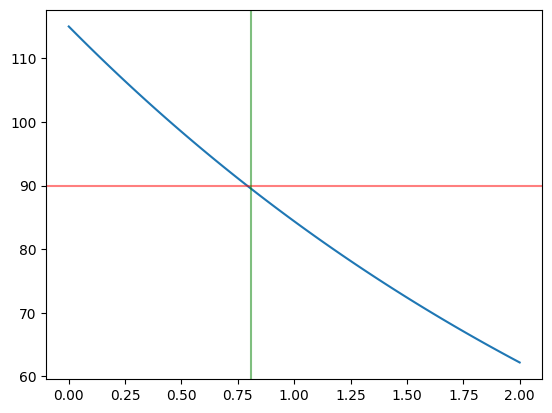

In [134]:
plt.plot(alphas, prices)
plt.axhline(P, color="r", alpha=0.5)
plt.axvline(alpha_, color="g", alpha=0.5)

### Solve symbolically

In [135]:
import sympy as sp

In [136]:
a = sp.Symbol("a")

In [137]:
cashflows = [F * c] * len(ts) + [F]
discounts = [sp.exp(- a * t) for t in [*ts, tF]]
discounted_cashflows = [cf * d for cf, d in zip(cashflows, discounts)]
formula = sum(discounted_cashflows) - P
formula

-90 + 100*exp(-0.333333333333333*a) + 5.0*exp(-0.25*a) + 5.0*exp(-0.166666666666667*a) + 5.0*exp(-0.0833333333333333*a)

As you can see, the solve() call is very slow

In [138]:
%timeit sp.solve(formula, a)

12.4 s ± 64.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Solve with Newton

In [3]:
def ytm_function(ytm_guess: float) -> float:
    price = 950  # Example market price
    par_value = 1000  # Example face value
    coupon_rate = 0.05  # 5% annual coupon rate
    years_to_maturity = 5  # Number of years to maturity
    frequency = 1  # Annual coupon payments

    coupon_payment = par_value * coupon_rate
    total_coupon_payments = years_to_maturity * frequency

    # Calculate the present value of coupon payments
    present_value_coupons = sum([coupon_payment / (1 + ytm_guess / frequency) ** (i + 1) for i in range(total_coupon_payments)])
    
    # Calculate the present value of the face value
    present_value_face_value = par_value / (1 + ytm_guess / frequency) ** total_coupon_payments
    
    # Calculate the total present value
    present_value_total = present_value_coupons + present_value_face_value
    
    # The YTM equation: Price = Present Value of Coupons + Present Value of Face Value
    return present_value_total - price

In [37]:
ytm_function(0.061935)

-0.011017858983905171

In [41]:
from scipy.optimize import newton

The newton method is fast in comparison to the sympy approach.

In [46]:
%timeit newton(ytm_function, x0=0.1)

99.9 µs ± 433 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
